In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [18, 8]

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
bank_original=pd.read_csv('/content/gdrive/Shareddrives/Statistical_Learning/bank-additional-full.csv', sep = ';')

In [ ]:
#List of Columns
bank_original.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
#Datatypes
bank_original.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
bank_original.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#Missing Value Analysis
missingValuePercentage=bank_original.isnull().sum()*100/len(bank_original)
missingValuePercentage

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
y=bank_original["y"]
x=bank_original.drop('y',axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
# combine xtrain, ytrain
bank = pd.concat([xtrain, ytrain], axis=1)
bank.shape

(30891, 21)

###DATA VISUALIZATION

Text(0, 0.5, 'Age')

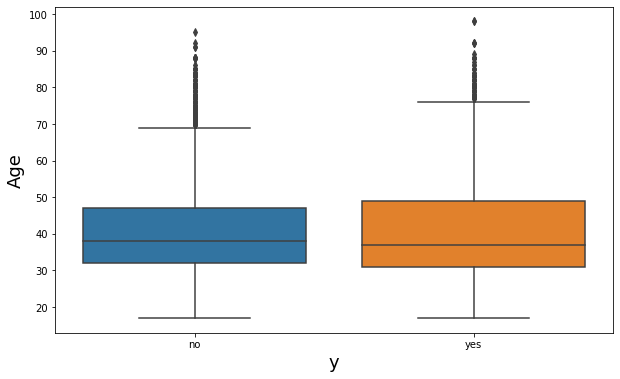

In [ ]:
# Age
plt.rcParams['figure.figsize'] = [10, 6]
sns.boxplot(x="y", y="age", data=bank)
plt.xlabel('y',fontsize=18)
plt.ylabel('Age',fontsize=18)

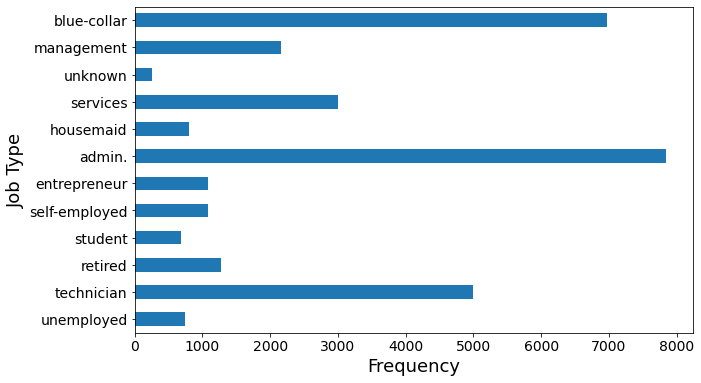

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]
jobTypeFreq=pd.value_counts(bank['job'].values, sort=False)
jobTypeFreq.plot.barh()
plt.xlabel('Frequency',fontsize=18)
plt.ylabel('Job Type',fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

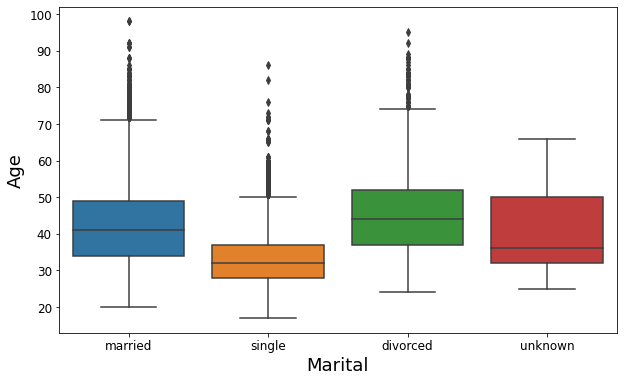

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]
boxplotOfMaritalVSAge=sns.boxplot(x="marital", y="age", data=bank)
boxplotOfMaritalVSAge.set_xlabel("Marital",fontsize=18)
boxplotOfMaritalVSAge.set_ylabel("Age",fontsize=18)
boxplotOfMaritalVSAge.tick_params(labelsize=12)

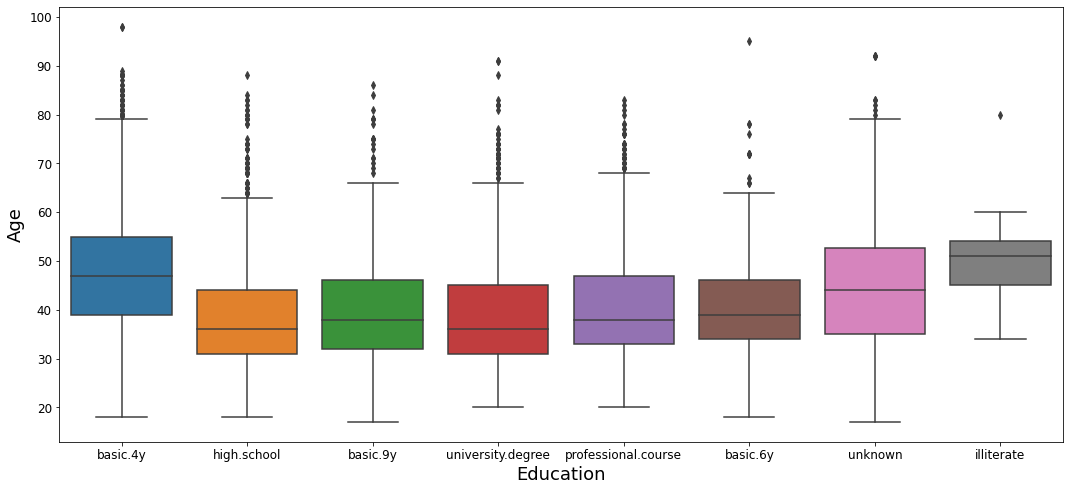

In [ ]:
plt.rcParams['figure.figsize'] = [18, 8]
boxplotOfMaritalVSAge=sns.boxplot(x="education", y="age", data=bank)
boxplotOfMaritalVSAge.set_xlabel("Education",fontsize=18)
boxplotOfMaritalVSAge.set_ylabel("Age",fontsize=18)
boxplotOfMaritalVSAge.tick_params(labelsize=12)

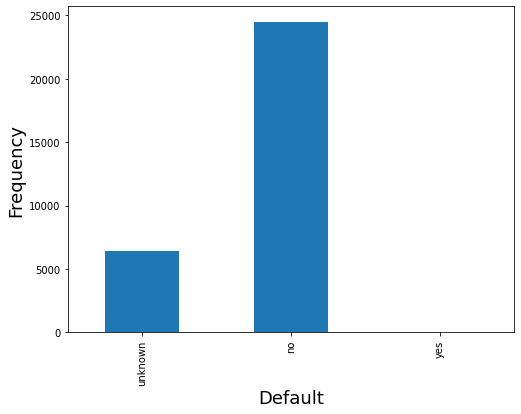

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
defaultFreq=pd.value_counts(bank['default'].values, sort=False)
plt.xlabel('Default',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
defaultFreq.plot.bar()

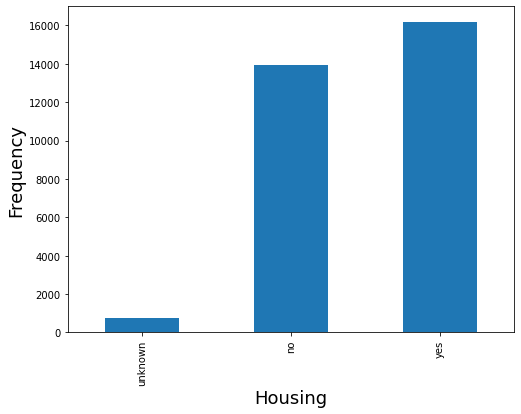

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
housingFreq=pd.value_counts(bank['housing'].values, sort=False)
plt.xlabel('Housing',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
housingFreq.plot.bar()

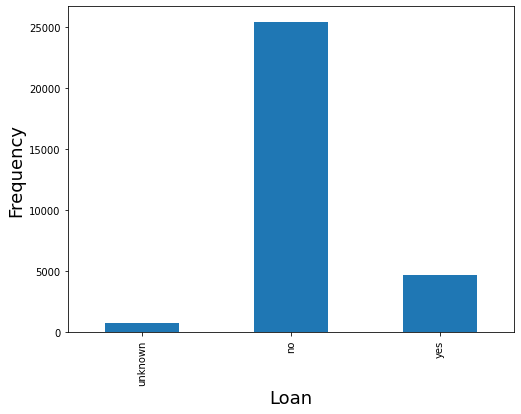

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
loanFreq=pd.value_counts(bank['loan'].values, sort=False)
plt.xlabel('Loan',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
loanFreq.plot.bar()

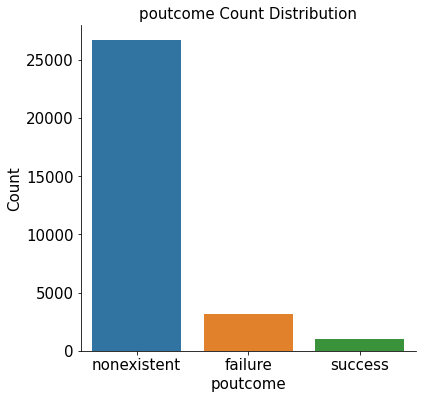

In [ ]:
#poutcome
plt.rcParams['figure.figsize']=[6, 6]
fig, ax = plt.subplots()
sns.countplot(x = 'poutcome', data = bank)
ax.set_xlabel('poutcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('poutcome Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

Value Counts:
cellular     19614
telephone    11277
Name: contact, dtype: int64
Analysis: Cellular way of contacting is way more than telephone because of working population.


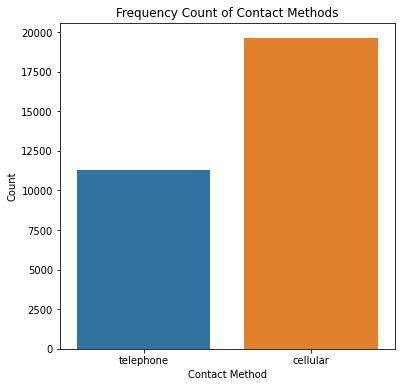

In [ ]:
#Contact : Type of Contact Reach (telephone/cellular)
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

fig=plt.figure()
ax = fig.add_subplot(1,1,1)

print("Value Counts:")
print(bank.contact.value_counts())

sns.countplot(x = 'contact', data = bank, ax = ax)
ax.set_xlabel("Contact Method")
ax.set_ylabel("Count")
ax.set_title("Frequency Count of Contact Methods")
ax.tick_params(labelsize=10)
print("Analysis: Cellular way of contacting is way more than telephone because of working population.")

Value Counts of days of week:
thu    6468
mon    6362
wed    6096
tue    6075
fri    5890
Name: day_of_week, dtype: int64
Analysis: Not high difference between the amount of calls, but clearly Monday and Thursday have a little lead than other days. 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


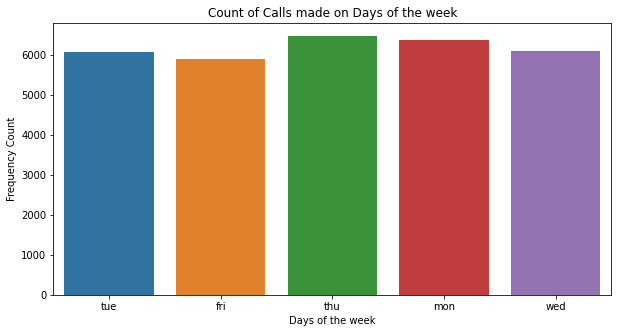

In [ ]:
# day_of_week:
fig, ax2 = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

print("Value Counts of days of week:")
print(bank.day_of_week.value_counts())

sns.countplot(bank['day_of_week'], ax = ax2)
ax2.set_xlabel("Days of the week")
ax2.set_ylabel("Frequency Count")
ax2.set_title("Count of Calls made on Days of the week") 

print("Analysis: Not high difference between the amount of calls, but clearly Monday and Thursday have a little lead than other days. ")

Value Counts of months:
may    10234
jul     5407
aug     4641
jun     4016
nov     3091
apr     1959
oct      552
sep      429
mar      425
dec      137
Name: month, dtype: int64
Analysis: Clearly May was the highest one and season wise it seems summer to autumn is the most preferred season for marketing campaign


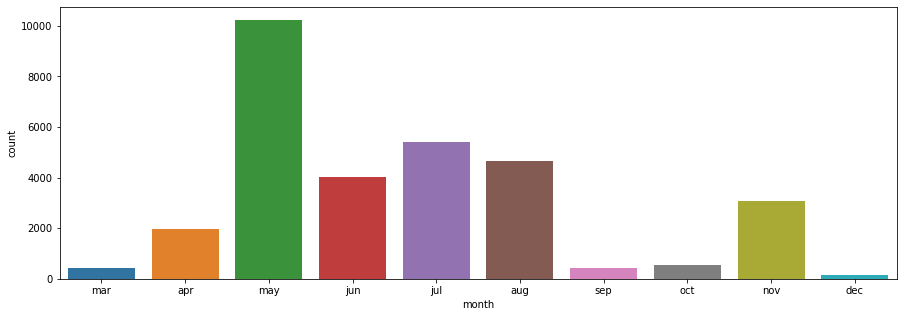

In [ ]:
#month:

print("Value Counts of months:")
print(bank.month.value_counts())

fig, ax2 = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'month', data = bank, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax.set_xlabel("Months")
ax.set_ylabel("Count")
ax.set_title("Count of contacts made in each month")
ax.tick_params(labelsize=15)
print("Analysis: Clearly May was the highest one and season wise it seems summer to autumn is the most preferred season for marketing campaign")

Text(0.5, 1.0, 'log(Duration) vs Jobs')

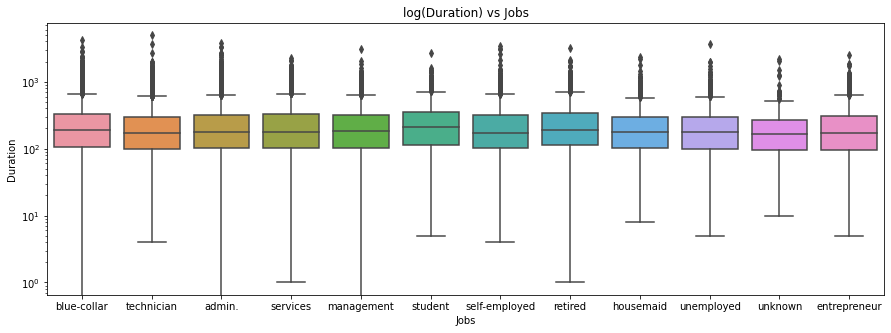

In [ ]:
#Relation between duration of calls and jobs: 

fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "job", y = "duration", data = bank, orient = 'v')
ax.set_xlabel("Jobs")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Jobs")

Text(0.5, 1.0, 'log(Duration) vs Education')

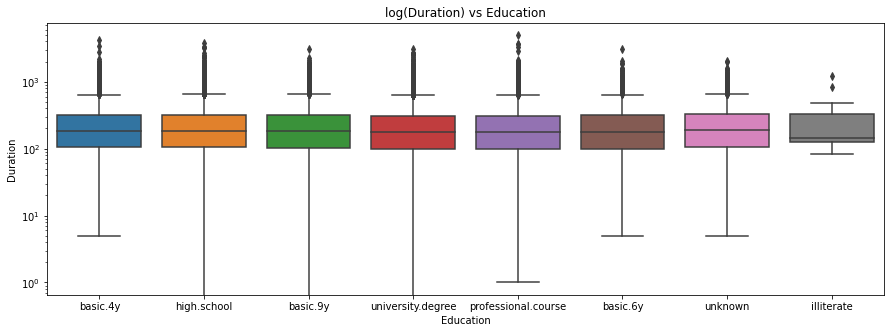

In [ ]:
##Relation between duration of calls and education: 

fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "education", y = "duration", data = bank, orient = 'v')
ax.set_xlabel("Education")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Education")

In [ ]:
print("Max duration  call in minutes:  ", round((bank['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank['duration'].std()/60),1))

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Campaign contacts count')

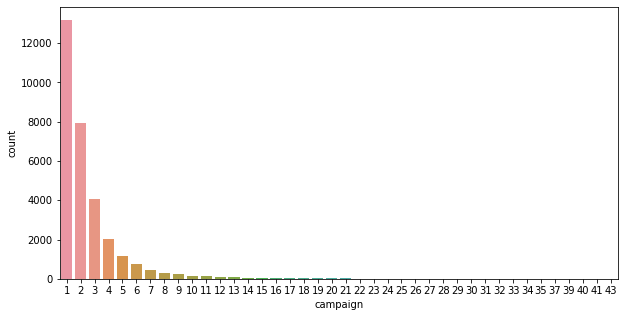

In [ ]:
#Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

sns.countplot(bank['campaign'], ax = ax1)
ax2.set_xlabel("Number of contacts performed during this campaign")
ax2.set_ylabel("Frequency Count")
ax2.set_title("Campaign contacts count")

Value Counts of months:
999    29772
3        324
6        315
4         85
12        44
2         44
9         43
10        40
7         38
5         34
13        23
1         22
11        22
15        19
14        15
8         15
0          9
16         8
17         7
18         5
22         2
21         1
20         1
19         1
25         1
27         1
Name: pdays, dtype: int64


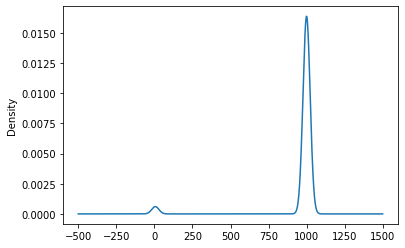

In [ ]:
#Pdays: number of days that passed by after the client was last contacted from a previous campaign
#(numeric; 999 means client was not previously contacted)
print("Value Counts of months:")
print(bank.pdays.value_counts())

bank['pdays'].plot(kind='kde')

Mostly the campaign are not performed for most of the clients!


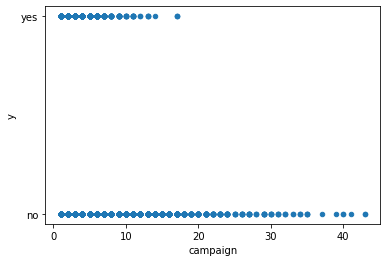

In [ ]:
#Previous: number of contacts performed before this campaign and for this client (numeric)
bank.plot(kind='scatter', x='campaign', y='y')

print("Mostly the campaign are not performed for most of the clients!")


## Feature Engineering#

In [ ]:
# Age
# categories age this helps because we have 78 differente values here

bank.loc[bank['age'] <= 32, 'age'] = 1
bank.loc[(bank['age'] > 32) & (bank['age'] <= 47), 'age'] = 2
bank.loc[(bank['age'] > 47) & (bank['age'] <= 70), 'age'] = 3
bank.loc[(bank['age'] > 70) & (bank['age'] <= 98), 'age'] = 4

bank['age'].replace({1: 'age_group_1', 2: 'age_group_2',3: 'age_group_3', 4: 'age_group_4'},inplace=True)

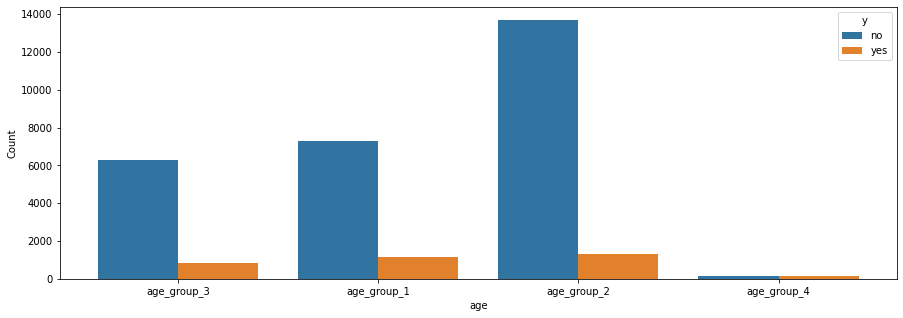

In [ ]:
fig, ax2 = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'age', data = bank, hue='y')
#ax.set_xlabel("Age_Group")
ax2.set_ylabel("Count")
#ax.set_title("Count of contacts made in each month")
plt.plot();

We see that most people in age_group_1 are not interested in term deposite. But we see that this does not hold for age_group_4. Among the 1st 3 groups the yes% does not change much with age group.

In [ ]:
# doing same operation on age for test data
xtest.loc[xtest['age'] <= 32, 'age'] = 1
xtest.loc[(xtest['age'] > 32) & (xtest['age'] <= 47), 'age'] = 2
xtest.loc[(xtest['age'] > 47) & (xtest['age'] <= 70), 'age'] = 3
xtest.loc[(xtest['age'] > 70) & (xtest['age'] <= 98), 'age'] = 4

xtest['age'].replace({1: 'age_group_1', 2: 'age_group_2',3: 'age_group_3', 4: 'age_group_4'},inplace=True)

In [ ]:
def duration(data):
    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5
    return data

duration(bank)
duration(xtest)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32884,age_group_3,technician,married,high.school,no,no,yes,cellular,may,mon,4,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
3169,age_group_3,unknown,married,unknown,unknown,yes,no,telephone,may,thu,3,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
32206,age_group_2,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,1,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
9403,age_group_2,admin.,married,high.school,no,no,no,telephone,jun,fri,4,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
14020,age_group_1,housemaid,married,high.school,no,yes,no,cellular,jul,fri,3,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35087,age_group_2,blue-collar,married,basic.9y,unknown,yes,no,cellular,may,fri,1,5,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1
12883,age_group_2,blue-collar,single,university.degree,unknown,yes,yes,cellular,jul,tue,1,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
3588,age_group_2,admin.,married,high.school,no,no,no,telephone,may,fri,3,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0
31192,age_group_2,services,divorced,basic.9y,no,no,no,cellular,may,wed,1,2,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1


In [ ]:
# poutcome : outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
#relationship between poutcome and y
df_crosstab = pd.crosstab(bank['poutcome'], bank['y'], margins = False)
df_crosstab_ratio = df_crosstab

df_crosstab_ratio['Row_total'] = df_crosstab_ratio.sum(axis=1) 
df_crosstab_ratio['no'] = df_crosstab_ratio['no']/df_crosstab_ratio['Row_total']
df_crosstab_ratio['yes'] = df_crosstab_ratio['yes']/df_crosstab_ratio['Row_total']
df_crosstab_ratio

y,no,yes,Row_total
poutcome,,,
failure,0.859018,0.140982,3199
nonexistent,0.911238,0.088762,26678
success,0.341223,0.658777,1014


65% (success_yes/total_success) of people who already subscribed to a term deposit after a previous contact have accepted to do it again. Even if they denied before, they’re still more enthusiastic to accept it (14%) than people who haven’t been contacted before (8.8%). So even if the previous campaign was a failure, recontacting people is important.

The rest five continious variables are social and economic indicators. They’re supposed to be highly correlated. Let’s compute the correlation matrix.

###ONE HOT ENCODING

In [ ]:
xtrain = bank.iloc[:,:-1]
ytrain = bank['y']

### NORMALIZING NUMERIC VARIABLES

In [ ]:
# separate numeric valraible
print(xtrain._get_numeric_data().head())
xtrain

       duration  campaign  pdays  ...  cons.conf.idx  euribor3m  nr.employed
549           2         1    999  ...          -36.4      4.857       5191.0
1974          3         4    999  ...          -36.4      4.855       5191.0
20992         1         3    999  ...          -36.1      4.964       5228.1
1730          4         1    999  ...          -36.4      4.855       5191.0
26913         4         2    999  ...          -42.0      4.076       5195.8

[5 rows x 9 columns]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
549,age_group_3,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1974,age_group_1,blue-collar,single,high.school,no,no,no,telephone,may,fri,3,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
20992,age_group_2,technician,married,high.school,no,yes,no,cellular,aug,thu,1,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
1730,age_group_1,blue-collar,single,basic.9y,no,yes,no,telephone,may,fri,4,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
26913,age_group_1,admin.,single,university.degree,no,yes,no,cellular,nov,thu,4,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,age_group_3,retired,married,professional.course,unknown,no,no,telephone,may,tue,4,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
11284,age_group_2,management,married,university.degree,no,no,no,telephone,jun,thu,3,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
38158,age_group_2,admin.,married,high.school,no,yes,no,cellular,oct,thu,3,1,4,1,success,-3.4,92.431,-26.9,0.754,5017.5
860,age_group_2,management,married,university.degree,no,yes,no,telephone,may,wed,3,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0


##Categorical Encoding

In [ ]:
xtrain=pd.get_dummies(xtrain)
xtest=pd.get_dummies(xtest)

missing_cols_train=set(xtrain.columns)-set(xtest.columns)
missing_cols_test=set(xtest.columns)-set(xtrain.columns)

for val in missing_cols_train:
    xtest[val]=0

for val in missing_cols_test:
    xtrain[val]=0   

xtest=xtest[xtrain.columns]

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain[xtrain.columns] = scaler.fit_transform(xtrain[xtrain.columns])
xtest[xtest.columns] = scaler.transform(xtest[xtest.columns])

In [ ]:
xtest

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_age_group_1,age_age_group_2,age_age_group_3,age_age_group_4,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
32884,0.75,0.000000,1.0,0.142857,0.333333,0.269680,0.192469,0.150759,0.512287,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3169,0.50,0.023810,1.0,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32206,0.00,0.000000,1.0,0.142857,0.333333,0.269680,0.192469,0.153933,0.512287,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9403,0.75,0.071429,1.0,0.000000,1.000000,0.882307,0.376569,0.982317,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14020,0.50,0.023810,1.0,0.000000,1.000000,0.669135,0.338912,0.981410,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35087,0.00,0.095238,1.0,0.000000,0.333333,0.269680,0.192469,0.139651,0.512287,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12883,0.00,0.023810,1.0,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3588,0.50,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957833,0.859735,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31192,0.00,0.023810,1.0,0.142857,0.333333,0.269680,0.192469,0.158694,0.512287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
# combining xtrain and y_train
bank_train = pd.concat([xtrain,ytrain],axis=1)
bank_test = pd.concat([xtest,ytest],axis=1)

In [ ]:
bank_train['y'].replace({'no': 0, 'yes': 1},inplace=True)
bank_test['y'].replace({'no': 0, 'yes': 1},inplace=True)

In [ ]:
corr_matrix = bank_train.corr(method = "pearson").abs()
    
# Select upper triangle of matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [ ]:
to_drop

['euribor3m',
 'nr.employed',
 'default_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'poutcome_success']

In [ ]:
# drop to_drop columns
bank_train.drop(to_drop,axis=1,inplace=True)
xtest.drop(to_drop,axis=1,inplace=True)

In [ ]:
ytrain=bank_train["y"]
xtrain=bank_train.drop('y',axis=1)

In [ ]:
ytest=bank_test["y"]
xtest=bank_test.drop('y',axis=1)

## Modelling

### Logistic Regression


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
cValues = [100, 10, 1.0, 0.1, 0.01]
logisticModel = LogisticRegression()

gridSearch=dict(solver=solvers,penalty=penalty,C=cValues)

cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
grid_search=GridSearchCV(estimator=logisticModel, param_grid=gridSearch, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result=grid_search.fit(xtrain, ytrain)
#Mean cross-validated score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.907934 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
logisticModel=LogisticRegression(C=1,penalty='l2',solver='liblinear') 
logisticModel.fit(xtrain,ytrain)
yPredictions=logisticModel.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(ytest, yPredictions))
print("Accuracy : ",accuracy_score(ytest, yPredictions)*100)
print("F1 Score : ",f1_score(ytest, yPredictions, average="macro")*100)
print("Precision: ",precision_score(ytest, yPredictions, average="macro")*100)
print("Recall   : ",recall_score(ytest, yPredictions, average="macro")*100) 

Confusion Matrix: 
[[8935  209]
 [ 707  446]]
Accuracy :  91.10420510828396
F1 Score :  72.23015585886307
Precision:  80.37954971174142
Recall   :  68.19802405987197


In [ ]:
logistic_accuracy=accuracy_score(ytest, yPredictions)*100
logistic_f1score=f1_score(ytest, yPredictions, average="macro")*100
logistic_precision=precision_score(ytest, yPredictions, average="macro")*100
logistic_recall=recall_score(ytest, yPredictions, average="macro")*100

K NEAREST NEIGHBORS

In [ ]:
#Perform cross validation and finds optimal K value for KNN: 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_opt = k+1
    knn = KNeighborsClassifier(n_neighbors = k_opt, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, xtrain, ytrain, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100) 
    print("k=%d %0.2f (+/- %0.2f)" % (k_opt, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

k=1 86.54 (+/- 0.48)
k=2 89.07 (+/- 0.41)
k=3 88.47 (+/- 0.47)
k=4 89.06 (+/- 0.46)
k=5 89.07 (+/- 0.30)
k=6 89.28 (+/- 0.37)
k=7 89.33 (+/- 0.22)
k=8 89.43 (+/- 0.39)
k=9 89.56 (+/- 0.36)
k=10 89.46 (+/- 0.46)
k=11 89.51 (+/- 0.45)
k=12 89.41 (+/- 0.40)
k=13 89.44 (+/- 0.35)
k=14 89.38 (+/- 0.43)
k=15 89.47 (+/- 0.42)
k=16 89.47 (+/- 0.49)
k=17 89.50 (+/- 0.39)
k=18 89.43 (+/- 0.46)
k=19 89.48 (+/- 0.46)
k=20 89.45 (+/- 0.43)
k=21 89.51 (+/- 0.38)
k=22 89.38 (+/- 0.43)
k=23 89.55 (+/- 0.36)
k=24 89.38 (+/- 0.45)
k=25 89.46 (+/- 0.44)
The optimal number of neighbors is 8 with 89.6%


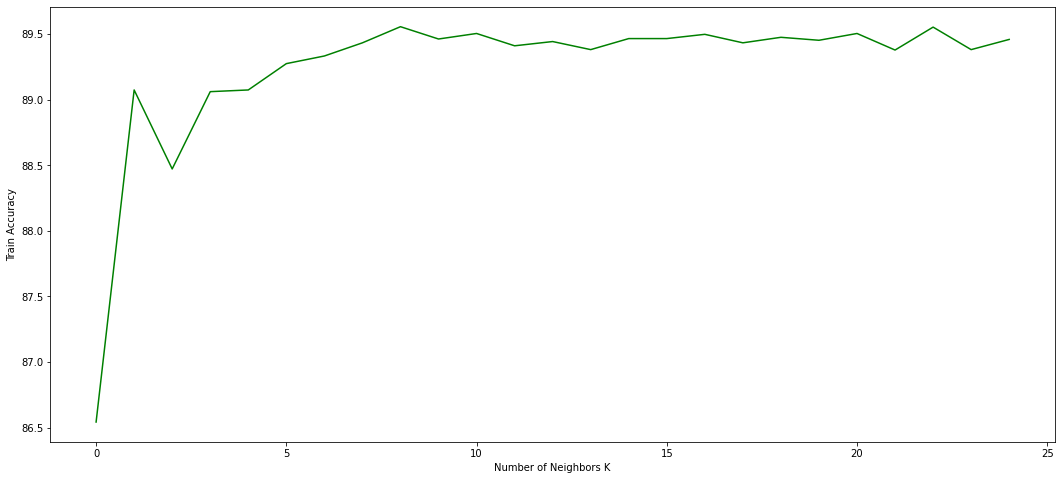

In [ ]:
plt.plot(neighbors, cv_scores, color="green")
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy') 
plt.show() 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(xtrain, ytrain) #fitting on train data
knnpred = knn.predict(xtest) #predicting on test data

In [ ]:
#Model Accuracy Evaluation: 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(ytest, knnpred))
acc_score_knn = accuracy_score(ytest, knnpred)*100
print("Accuracy : ",accuracy_score(ytest, knnpred)*100)
f1_score_knn = f1_score(ytest, knnpred, average="macro")*100
print("F1 Score : ",f1_score(ytest, knnpred, average="macro")*100)
prec_score_knn = precision_score(ytest, knnpred, average="macro")*100
print("Precision: ",precision_score(ytest, knnpred, average="macro")*100)
recall_score_knn = recall_score(ytest, knnpred, average="macro")*100
print("Recall   : ",recall_score(ytest, knnpred, average="macro")*100)  

Confusion Matrix: 
[[9057   87]
 [1003  150]]
Accuracy :  89.41439254151695
F1 Score :  57.953416479480445
Precision:  76.66048015703248
Recall   :  56.029048380010614


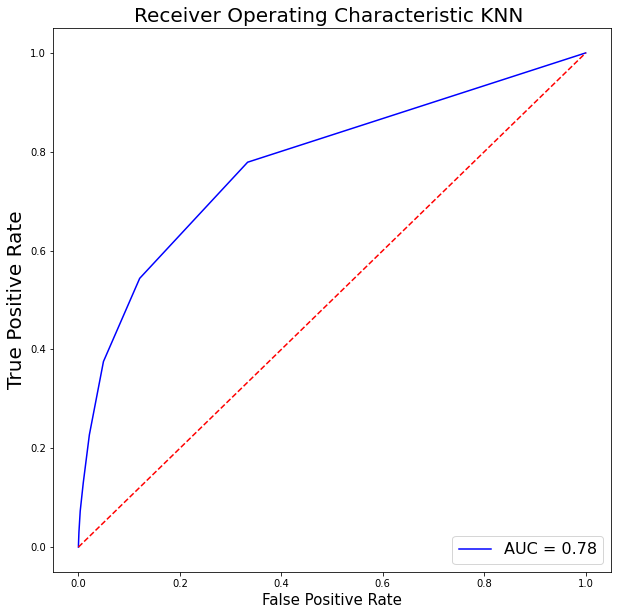

In [ ]:
#Plotting ROC Curve: 
from sklearn import metrics
fig, ax_arr = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
probs = knn.predict_proba(xtest)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(ytest, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr.plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr.plot([0, 1], [0, 1],'r--')
ax_arr.set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr.set_ylabel('True Positive Rate',fontsize=20)
ax_arr.set_xlabel('False Positive Rate',fontsize=15)
ax_arr.legend(loc = 'lower right', prop={'size': 16})

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(xtrain, ytrain)
rfcpred = rfc.predict(xtest)

print(confusion_matrix(ytest, rfcpred ))
RFCCV = (cross_val_score(rfc, xtrain, ytrain, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8802  342]
 [ 640  513]]


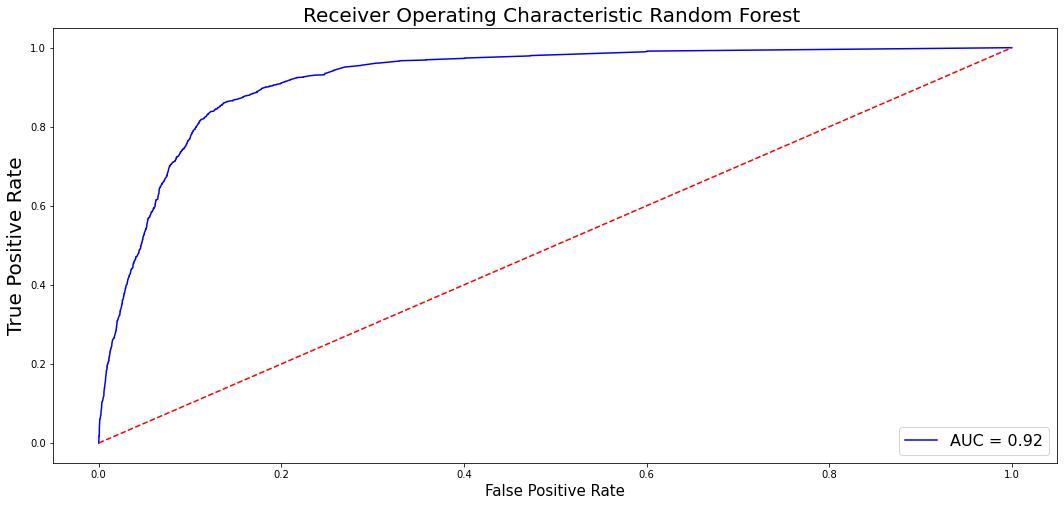

In [ ]:
from sklearn import metrics
probs = rfc.predict_proba(xtest)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(ytest, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

fig, ax_arr = plt.subplots()

ax_arr.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr.plot([0, 1], [0, 1],'r--')
ax_arr.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr.set_ylabel('True Positive Rate',fontsize=20)
ax_arr.set_xlabel('False Positive Rate',fontsize=15)
ax_arr.legend(loc = 'lower right', prop={'size': 16})


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(ytest, rfcpred))
print("Accuracy : ",accuracy_score(ytest, rfcpred)*100)
print("F1 Score : ",f1_score(ytest, rfcpred, average="macro")*100)
print("Precision: ",precision_score(ytest, rfcpred, average="macro")*100)
print("Recall   : ",recall_score(ytest, rfcpred, average="macro")*100) 

Confusion Matrix: 
[[8802  342]
 [ 640  513]]
Accuracy :  90.46324172088957
F1 Score :  72.90603538712898
Precision:  76.61088752382969
Recall   :  70.3762352234158


In [ ]:
random_forest_accuracy=accuracy_score(ytest, rfcpred)*100
random_forest_f1score=f1_score(ytest, rfcpred, average="macro")*100
random_forest_precision=precision_score(ytest, rfcpred, average="macro")*100
random_forest_recall=recall_score(ytest, rfcpred, average="macro")*100

In [ ]:
accuracy=[logistic_accuracy,acc_score_knn,random_forest_accuracy]
f1score=[logistic_f1score,f1_score_knn,random_forest_f1score]
precision=[logistic_precision,prec_score_knn,random_forest_precision]
recall=[logistic_recall,recall_score_knn,random_forest_recall]


models = pd.DataFrame({
    'Model': ['Logistic Regressor', 'kNN', 
              'Random Forest Classifier'],
    'accuracy': accuracy,
    'f1score': f1score,
    'precision': precision,
    'recall': recall
                     })

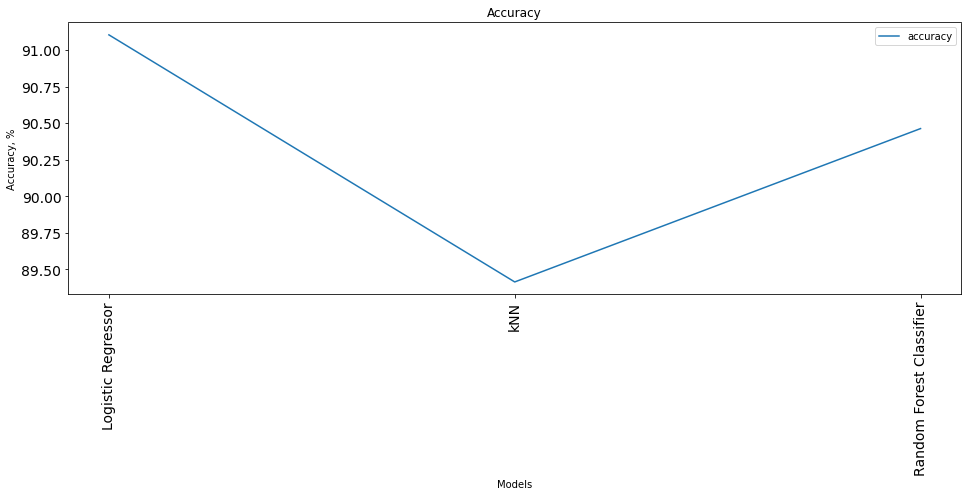

In [ ]:
plt.figure(figsize=[16,5])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['accuracy'], label = 'accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy, %')
plt.xticks(xx, rotation='vertical')
plt.show()

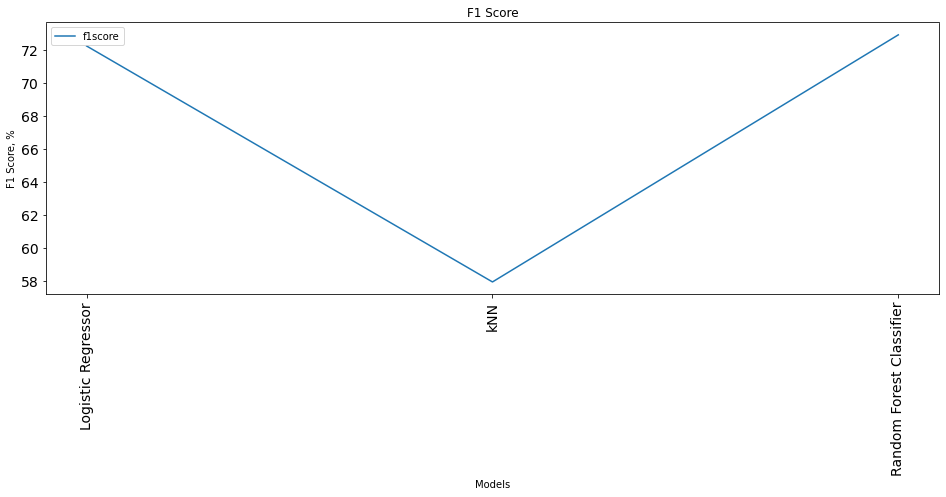

In [ ]:
plt.figure(figsize=[16,5])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['f1score'], label = 'f1score')
plt.legend()
plt.title('F1 Score')
plt.xlabel('Models')
plt.ylabel('F1 Score, %')
plt.xticks(xx, rotation='vertical')
plt.show()

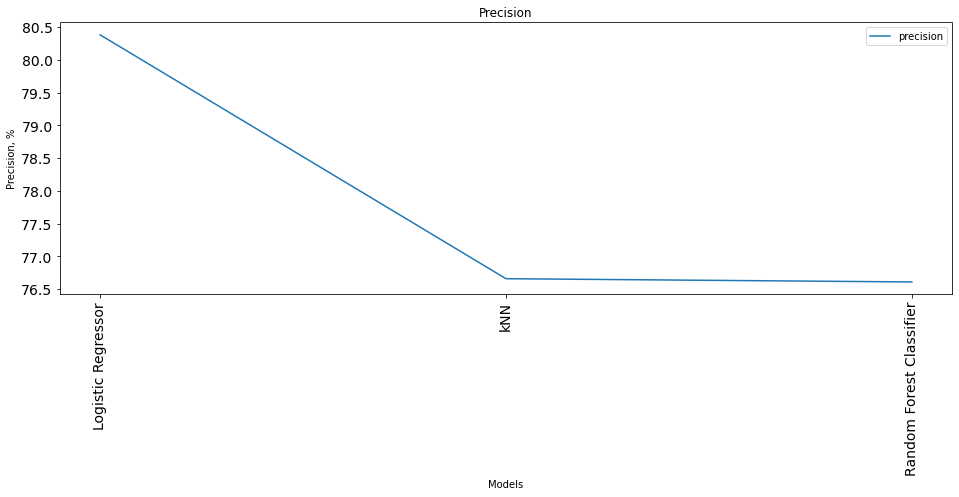

In [ ]:
plt.figure(figsize=[16,5])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['precision'], label = 'precision')
plt.legend()
plt.title('Precision')
plt.xlabel('Models')
plt.ylabel('Precision, %')
plt.xticks(xx, rotation='vertical')
plt.show()

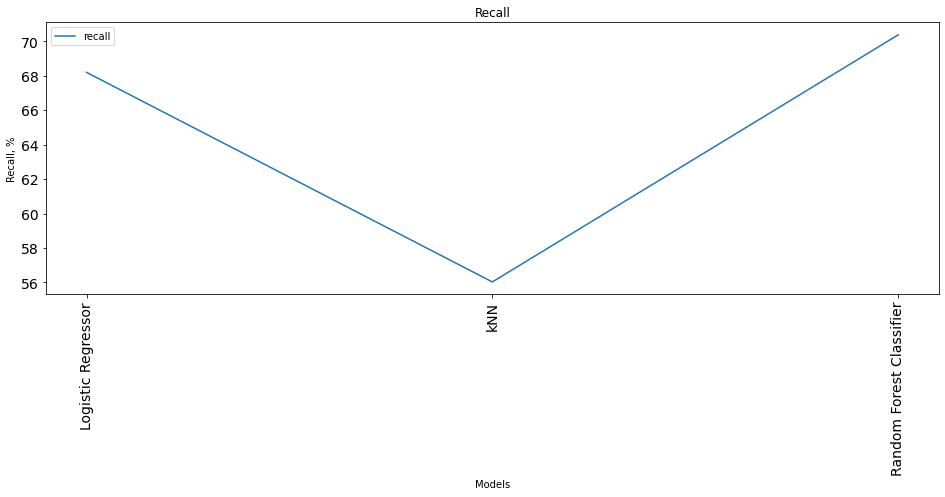

In [ ]:
plt.figure(figsize=[16,5])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['recall'], label = 'recall')
plt.legend()
plt.title('Recall')
plt.xlabel('Models')
plt.ylabel('Recall, %')
plt.xticks(xx, rotation='vertical')
plt.show()